In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv('Cleaned_Luxury_Housing_Bangalore.csv')
df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,...,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Price_per_Sqft,Quarter_Label,Booking_Status,Booking_Count,Booking_Conversion_Rate
0,PROP000001,Sarjapur Road,Project_0,Rmz,4025.0,4BHK,12.750846,Primary,NRI,2025-03-31,...,Broker,1,9.212491,18,Loved The Amenities!,31679.120594,2025Q1,Booked,1,0.494
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3BHK,16.292152,Primary,Other,2024-06-30,...,Nri Desk,0,7.723898,106,No Comments,28284.985887,2024Q2,Booked,1,0.508
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4BHK,10.517724,Primary,HNI,2023-12-31,...,Direct,1,6.985493,113,Agent Was Not Responsive.,13646.976013,2023Q4,Booked,1,0.506
3,PROP000004,Bellary Road,Project_3,Embassy,6192.0,3BHK,9.396367,Primary,HNI,2024-03-31,...,Online,1,6.100929,106,Excellent Location!,15175.012103,2024Q1,Booked,1,0.497
4,PROP000005,Koramangala,Project_4,Snn Raj,7147.0,4BHK,15.345392,Secondary,HNI,2024-12-31,...,Broker,0,5.312510,18,Too Far From My Office.,21471.096187,2024Q4,Not Booked,0,0.507


Quarterly bookings across Micro-Markets

In [7]:
market_trends = (df.groupby(["Quarter_Label", "Micro_Market"])["Booking_Count"].sum().reset_index().sort_values("Quarter_Label"))
market_trends.head()


,Quarter_Label,Micro_Market,Booking_Count
0,2023Q2,Bannerghatta Road,395
15,2023Q2,Yelahanka,365
14,2023Q2,Whitefield,378
13,2023Q2,Sarjapur Road,393
12,2023Q2,Rajajinagar,382


Sum & average ticket price per builder

In [6]:
builder_performance = (df.groupby("Developer_Name")["Ticket_Price_Cr"].agg(["sum", "mean", "count"]).reset_index().rename(columns={"sum": "Total_Ticket_Sales","mean": "Avg_Ticket_Size","count": "Units_Sold"}))
builder_performance.head()

,Developer_Name,Total_Ticket_Sales,Avg_Ticket_Size,Units_Sold
0,Brigade,115829.319143,12.535641,9240
1,Embassy,114828.546149,12.530396,9164
2,Godrej,116854.073131,12.680854,9215
3,L&T Realty,117186.213731,12.703113,9225
4,Prestige,117733.813926,12.635095,9318


Correlation between Amenity Score and Booking Success

  Property_ID       Micro_Market Project_Name Developer_Name  Unit_Size_Sqft  \
0  PROP000001      Sarjapur Road    Project_0            Rmz          4025.0   
1  PROP000002        Indiranagar    Project_1    Puravankara          5760.0   
2  PROP000003  Bannerghatta Road    Project_2   Tata Housing          7707.0   
3  PROP000004       Bellary Road    Project_3        Embassy          6192.0   
4  PROP000005        Koramangala    Project_4        Snn Raj          7147.0   

  Configuration  Ticket_Price_Cr Transaction_Type Buyer_Type Purchase_Quarter  \
0          4BHK        12.750846          Primary        NRI       2025-03-31   
1          3BHK        16.292152          Primary      Other       2024-06-30   
2          4BHK        10.517724          Primary        HNI       2023-12-31   
3          3BHK         9.396367          Primary        HNI       2024-03-31   
4          4BHK        15.345392        Secondary        HNI       2024-12-31   

   ...  Sales_Channel  NRI_Buyer

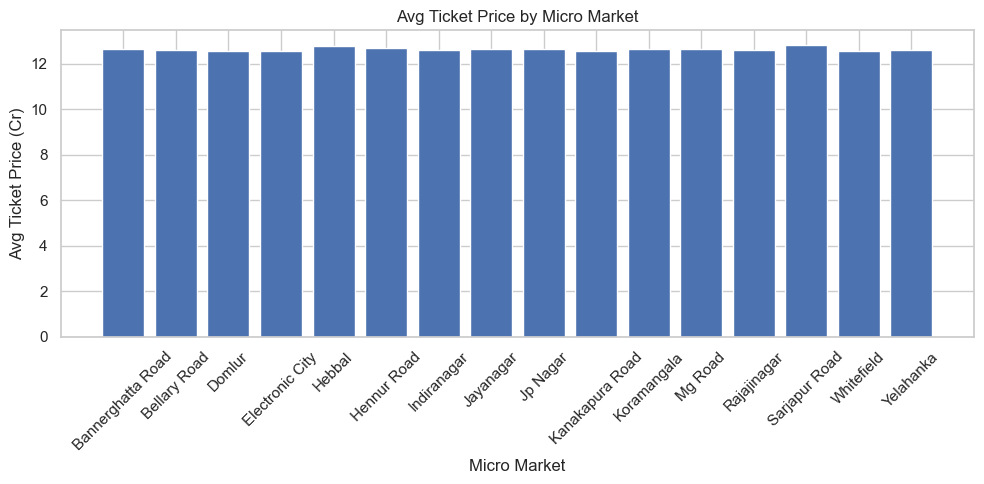

         Micro_Market  Count
0            Jp Nagar   6441
1       Sarjapur Road   6435
2   Bannerghatta Road   6427
3           Jayanagar   6427
4             Mg Road   6347
5          Whitefield   6340
6         Indiranagar   6323
7     Kanakapura Road   6292
8           Yelahanka   6290
9        Bellary Road   6277
10        Rajajinagar   6274
11    Electronic City   6273
12             Domlur   6250
13             Hebbal   6235
14        Hennur Road   6216
15        Koramangala   6153


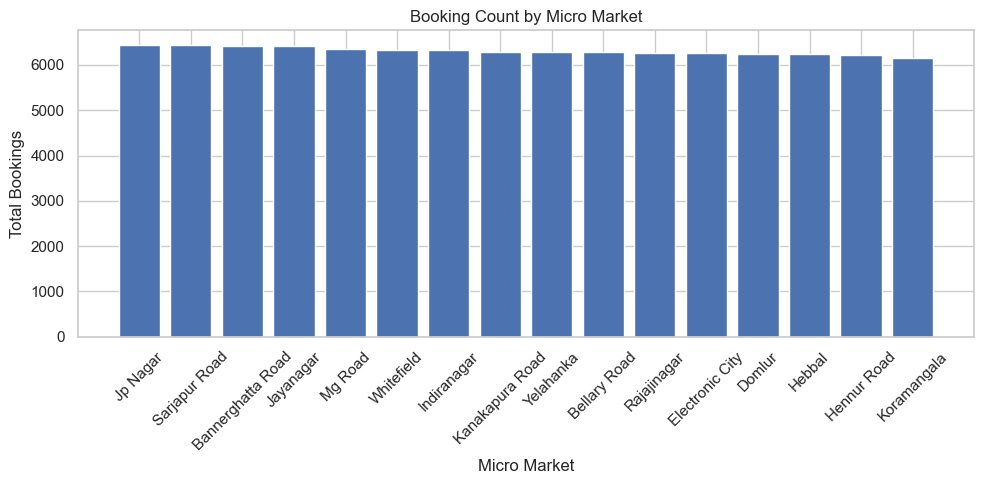

       Developer_Name  Ticket_Price_Cr
4            Prestige    117733.813926
10  Total Environment    117310.818611
3          L&T Realty    117186.213731
2              Godrej    116854.073131
7             Snn Raj    116733.158860
5         Puravankara    116003.218852
0             Brigade    115829.319143
8               Sobha    115634.258671
6                 Rmz    115136.121960
1             Embassy    114828.546149
9        Tata Housing    113614.994108


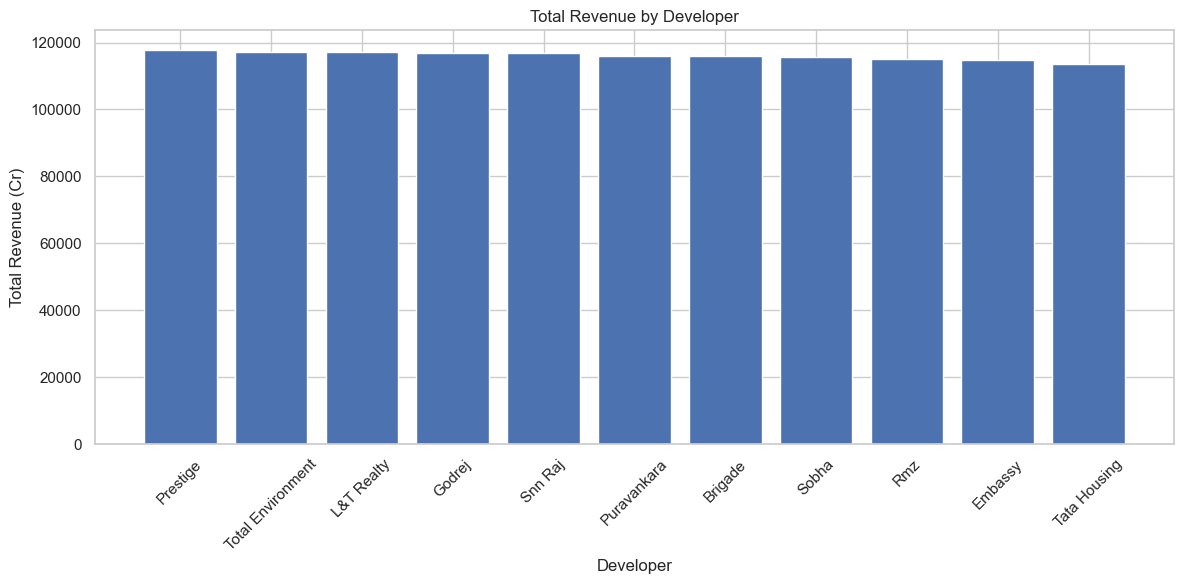

        Buyer_Type  Count
0              CXO  20340
1              NRI  20207
2  Startup Founder  20185
3            Other  20149
4              HNI  20119


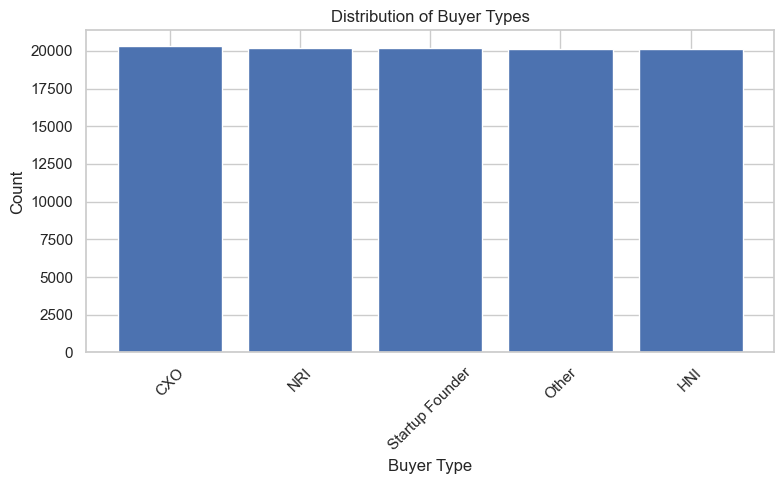

    Possession_Status  Count
0  Under Construction  33769
1              Launch  33641
2       Ready To Move  33590


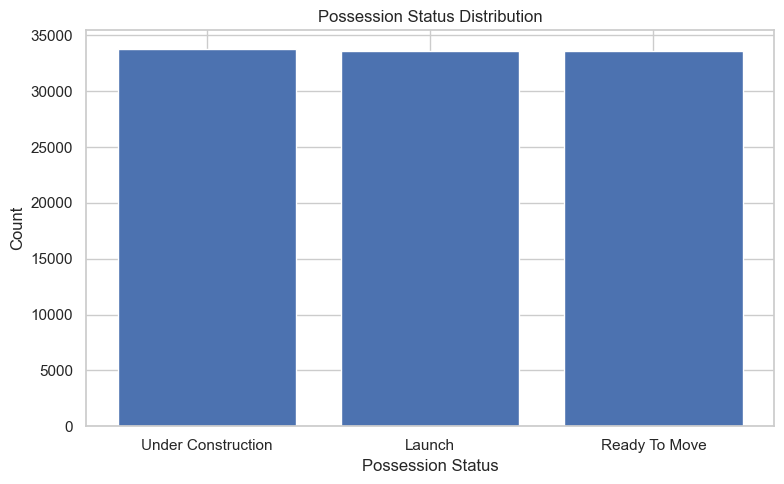

  Sales_Channel  Count
0        Online  25411
1        Broker  25385
2      Nri Desk  25271
3        Direct  24933


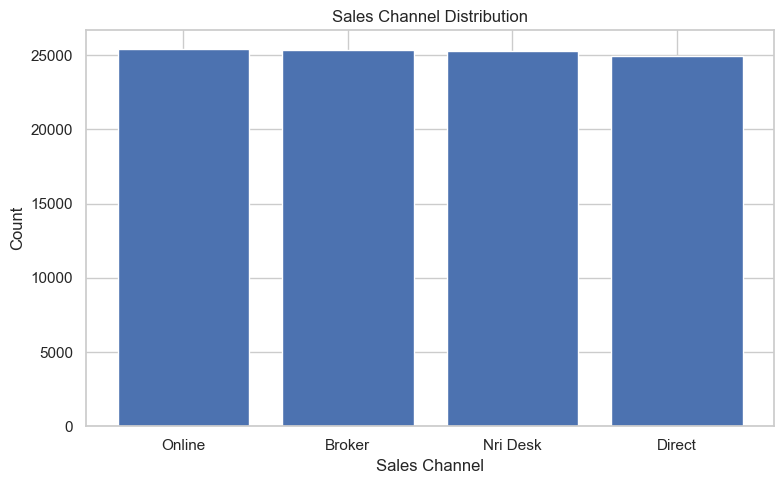

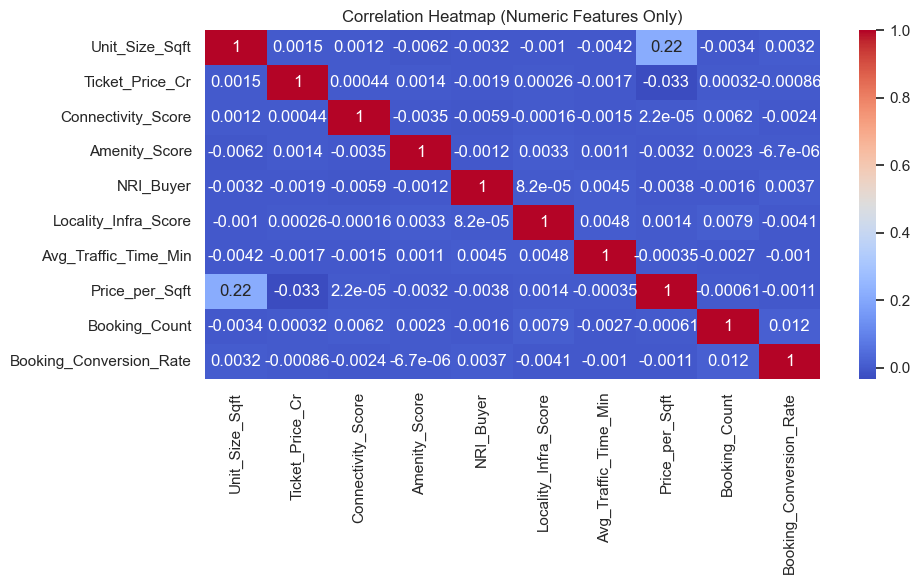

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("Cleaned_Luxury_Housing_Bangalore.csv")

# --------------------------------------------------
# 1. Basic Summary
# --------------------------------------------------
print(df.head())
print(df.describe(include='all'))
print(df.isnull().sum())

# ==================================================
# ANALYSIS + PLOTS
# ==================================================


# --------------------------------------------------
# 2. Avg Ticket Price by Micro Market
# --------------------------------------------------
avg_price = df.groupby("Micro_Market")["Ticket_Price_Cr"].mean().reset_index()
print(avg_price)

plt.figure(figsize=(10,5))
plt.bar(avg_price["Micro_Market"], avg_price["Ticket_Price_Cr"])
plt.xticks(rotation=45)
plt.xlabel("Micro Market")
plt.ylabel("Avg Ticket Price (Cr)")
plt.title("Avg Ticket Price by Micro Market")
plt.tight_layout()
plt.show()


# --------------------------------------------------
# 3. Booking Count by Micro Market
# --------------------------------------------------
booking_count = df["Micro_Market"].value_counts().reset_index()
booking_count.columns = ["Micro_Market", "Count"]
print(booking_count)

plt.figure(figsize=(10,5))
plt.bar(booking_count["Micro_Market"], booking_count["Count"])
plt.xticks(rotation=45)
plt.xlabel("Micro Market")
plt.ylabel("Total Bookings")
plt.title("Booking Count by Micro Market")
plt.tight_layout()
plt.show()


# --------------------------------------------------
# 4. Total Revenue by Developer
# --------------------------------------------------
dev_rev = df.groupby("Developer_Name")["Ticket_Price_Cr"].sum().reset_index()
dev_rev = dev_rev.sort_values("Ticket_Price_Cr", ascending=False)
print(dev_rev)

plt.figure(figsize=(12,6))
plt.bar(dev_rev["Developer_Name"], dev_rev["Ticket_Price_Cr"])
plt.xticks(rotation=45)
plt.xlabel("Developer")
plt.ylabel("Total Revenue (Cr)")
plt.title("Total Revenue by Developer")
plt.tight_layout()
plt.show()


# --------------------------------------------------
# 5. Buyer Type Count
# --------------------------------------------------
buyer_count = df["Buyer_Type"].value_counts().reset_index()
buyer_count.columns = ["Buyer_Type", "Count"]
print(buyer_count)

plt.figure(figsize=(8,5))
plt.bar(buyer_count["Buyer_Type"], buyer_count["Count"])
plt.xticks(rotation=45)
plt.xlabel("Buyer Type")
plt.ylabel("Count")
plt.title("Distribution of Buyer Types")
plt.tight_layout()
plt.show()


# --------------------------------------------------
# 6. Possession Status Impact (Count Plot)
# --------------------------------------------------
pos_count = df["Possession_Status"].value_counts().reset_index()
pos_count.columns = ["Possession_Status", "Count"]
print(pos_count)

plt.figure(figsize=(8,5))
plt.bar(pos_count["Possession_Status"], pos_count["Count"])
plt.xlabel("Possession Status")
plt.ylabel("Count")
plt.title("Possession Status Distribution")
plt.tight_layout()
plt.show()


# --------------------------------------------------
# 7. Sales Channel Analysis
# --------------------------------------------------
sales_channel = df["Sales_Channel"].value_counts().reset_index()
sales_channel.columns = ["Sales_Channel", "Count"]
print(sales_channel)

plt.figure(figsize=(8,5))
plt.bar(sales_channel["Sales_Channel"], sales_channel["Count"])
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.title("Sales Channel Distribution")
plt.tight_layout()
plt.show()


# --------------------------------------------------
# 8. Correlation Heatmap (Numerical Columns)
# --------------------------------------------------
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

